In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, MaxPooling2D, GlobalAveragePooling2D, Dense


In [2]:
train_path = "../Computer Vision Masterclass/Datasets/cat_dog_2/training_set"
test_path = "../Computer Vision Masterclass/Datasets/cat_dog_2/test_set"

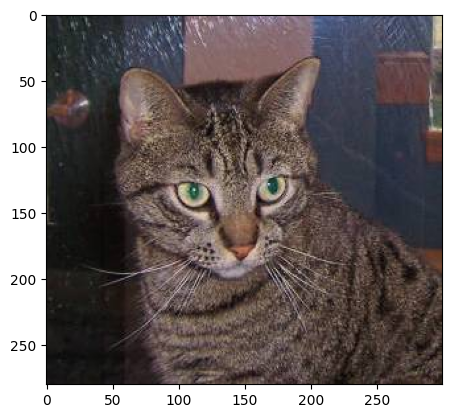

In [3]:
img = cv2.imread(train_path + "/cat/cat.1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)

In [4]:
# ImageDataGenerator to apply data augmentation, randomly translating, rotating, resizing, etc.
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen.fill_mode='constant'
train_datagen.horizontal_flip=True
train_datagen.zoom_range=[0.8, 1.2]
train_datagen.rotation_range=20
train_datagen.shear_range=10
train_datagen.brightness_range = [0.75, 1.5]



#making image as 227X227 for input of alexnet
# train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical')
train = train_datagen.flow_from_directory(train_path, target_size=(64, 64), shuffle=True, class_mode='categorical')


Found 4000 images belonging to 2 classes.


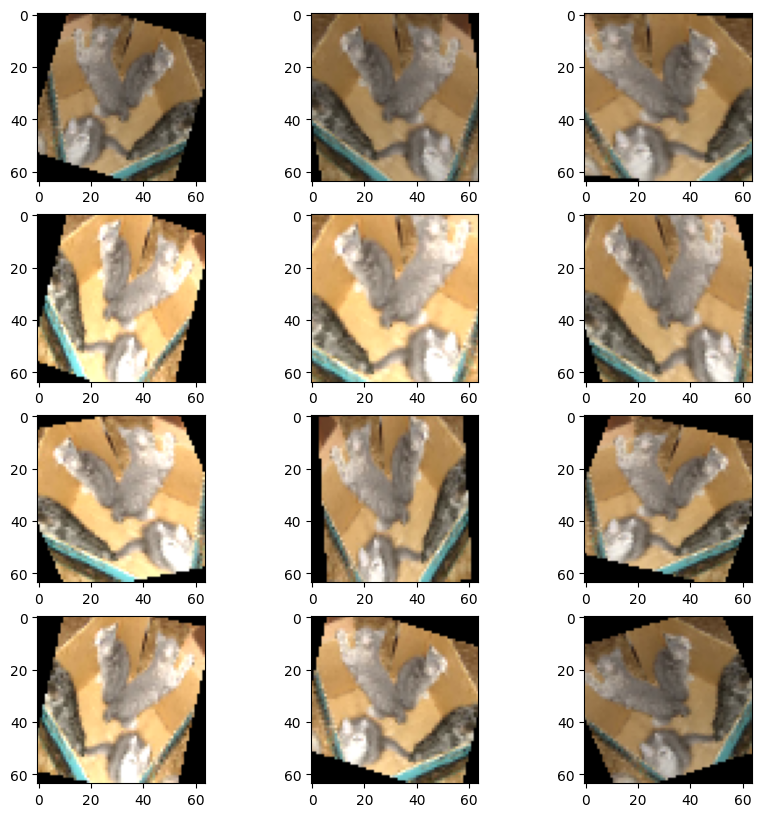

In [5]:
fig , axs = plt.subplots(4,3 ,figsize = (10,10))

axs[0][0].imshow(train[1][0][0])
axs[0][1].imshow(train[1][0][0])
axs[0][2].imshow(train[1][0][0])
axs[1][0].imshow(train[1][0][0])
axs[1][1].imshow(train[1][0][0])
axs[1][2].imshow(train[1][0][0])
axs[2][0].imshow(train[1][0][0])
axs[2][1].imshow(train[1][0][0])
axs[2][2].imshow(train[1][0][0])
axs[3][0].imshow(train[1][0][0])
axs[3][1].imshow(train[1][0][0])
axs[3][2].imshow(train[1][0][0])

In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test = test_datagen.flow_from_directory(test_path, target_size=(64,64), shuffle=False, class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [18]:

def residual_block(X, filters, strides=1):
    shortcut = X

    # First component of the main path
    X = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Second component of the main path
    X = Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')(X)
    X = BatchNormalization()(X)

    # Shortcut Path
    if strides != 1:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut to the main path
    X = Add()([X, shortcut])
    X = Activation('relu')(X)

    return X


def residual_block2(X, filters, strides=1):
    shortcut = X

    # First component of the main path
    X = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Second component of the main path
    X = Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')(X)

    # Shortcut Path
    if strides != 1:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut to the main path
    X = Add()([X, shortcut])
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    return X


def residual_block3(X, filters, strides=1):
    shortcut = X

    # First component of the main path
    X = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Second component of the main path
    X = Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Shortcut Path
    if strides != 1:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut to the main path
    X = Add()([X, shortcut])

    return X
    

def residual_block4(X, filters, strides=1):
    shortcut = X

    # First component of the main path
    X = Activation('relu')(X)
    X = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(X)
    X = BatchNormalization()(X)

    # Second component of the main path
    X = Activation('relu')(X)
    X = Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')(X)
    X = BatchNormalization()(X)

    # Shortcut Path
    if strides != 1:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut to the main path
    X = Add()([X, shortcut])

    return X


def residual_block5(X, filters, strides=1):
    shortcut = X

    # First component of the main path
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(X)

    # Second component of the main path
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')(X)

    # Shortcut Path
    if strides != 1:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut to the main path
    X = Add()([X, shortcut])

    return X



X_input = Input(shape=(64, 64, 3))

# Stage 1
X = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(X_input)
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(X)

# Stage 2
X = residual_block(X, filters=64, strides=1)
X = residual_block(X, filters=64, strides=1)

# Stage 3
X = residual_block(X, filters=128, strides=2)
X = residual_block(X, filters=128, strides=1)

# Stage 4
X = residual_block(X, filters=256, strides=2)
X = residual_block(X, filters=256, strides=1)

# Stage 5
X = residual_block(X, filters=512, strides=2)
X = residual_block(X, filters=512, strides=1)

# Average Pooling
X = GlobalAveragePooling2D()(X)

# Output layer
X = Dense(2, activation='softmax')(X)

# Create model
network = Model(inputs=X_input, outputs=X, name='ResNet18')

network.summary()


Model: "ResNet18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_81 (Conv2D)  │ (None, 32, 32,    │      9,472 │ input_layer_6[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_81[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_64       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 16, 16,    │          0 │ activation_64[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 16, 16,    │     36,928 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_82[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_65       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 16, 16,    │     36,928 │ activation_65[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_83[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_31 (Add)        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_66       │ (None, 16, 16,    │          0 │ add_31[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 16, 16,    │     36,928 │ activation_66[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_84[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_67       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_85 (Conv2D)  │ (None, 16, 16,    │     36,928 │ activation_67[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_85[0][0] 

 Total params: 11,191,938 (42.69 MB)

 Trainable params: 11,182,338 (42.66 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [19]:
# Define the learning rate you want to use
learning_rate = 0.0003  # Example learning rate

# Instantiate the Adam optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile your neural network model with the customized optimizer
network.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = network.fit(train, epochs=20)

Epoch 1/20


d:\D-Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 176ms/step - accuracy: 0.5613 - loss: 0.8429
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.6418 - loss: 0.6476
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.6922 - loss: 0.5869
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.6898 - loss: 0.5867
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.7095 - loss: 0.5589
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.7229 - loss: 0.5481
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.7200 - loss: 0.5503
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.7415 - loss: 0.5263
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.7586 - loss: 0.4980
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.7586 - loss: 0.4885
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.7877 - loss: 0.4655
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━

In [21]:
predictions = network.predict(test)
predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step


array([[0.88957757, 0.11042243],
       [0.25172585, 0.74827415],
       [0.19636673, 0.8036332 ],
       ...,
       [0.00674131, 0.9932587 ],
       [0.06659511, 0.9334049 ],
       [0.20347495, 0.796525  ]], dtype=float32)

In [22]:
# predicted values
predictions = np.argmax(predictions, axis=1)
predictions 

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

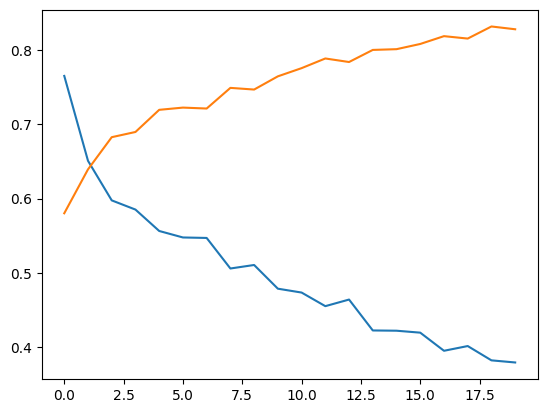

In [23]:
plt.plot(history.history['loss'] )
plt.plot(history.history['accuracy'] )

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(test.classes, predictions)

0.766